In [1]:
from train import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

logging.getLogger('tensorflow').setLevel(logging.WARNING)

In [2]:
number_of_train_test_splits = 30
PARAMS

{'cv_folds': 5,
 'div_const': 100,
 'dropout': 0.0,
 'layers': [100, 100],
 'learning_rate': 0.01,
 'max_steps': 100,
 'test_ratio': 0.2,
 'training_set_size': 90000}

In [3]:
all_data = tf.contrib.learn.datasets.base.load_csv_without_header(
    filename="micro_data.csv",
    target_dtype=np.float32,
    features_dtype=np.float32) 

X = all_data.data[:,:15]
y = all_data.target / PARAMS['div_const']
X = (X - np.mean(X, axis=0, keepdims=True))/np.std(X, axis=0, keepdims=True)

In [11]:
def stats(normalized_X, normalized_y):
    X_train, X_test, y_train, y_test = train_test_split(
        normalized_X, normalized_y, test_size=PARAMS['test_ratio'])
    return do_training(1, X_train, X_test, y_train, y_test)

def get_error_distribution(X, y, number_of_splits):
    stats_dicts = []
    for i in range(number_of_splits):
        print(i)
        stats_dicts.append(stats(X, y))
    stats_df = pd.DataFrame(stats_dicts)
    return stats_df

In [5]:
stats_df = get_error_distribution(X, y, number_of_train_test_splits)

0
Removing old model dir...
1
Removing old model dir...
2
Removing old model dir...
3
Removing old model dir...
4
Removing old model dir...
5
Removing old model dir...
6
Removing old model dir...
7
Removing old model dir...
8
Removing old model dir...
9
Removing old model dir...
10
Removing old model dir...
11
Removing old model dir...
12
Removing old model dir...
13
Removing old model dir...
14
Removing old model dir...
15
Removing old model dir...
16
Removing old model dir...
17
Removing old model dir...
18
Removing old model dir...
19
Removing old model dir...
20
Removing old model dir...
21
Removing old model dir...
22
Removing old model dir...
23
Removing old model dir...
24
Removing old model dir...
25
Removing old model dir...
26
Removing old model dir...
27
Removing old model dir...
28
Removing old model dir...
29
Removing old model dir...


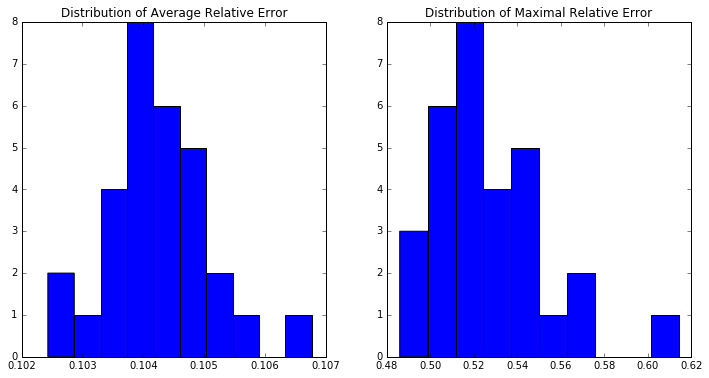

In [6]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1, title = "Distribution of Average Relative Error")
plt.hist(stats_df["relative_avg_err"].values)
plt.subplot(1, 2, 2, title = "Distribution of Maximal Relative Error")
plt.hist(stats_df["relative_max_err"].values)
plt.show()